In [ ]:
# this is a demo study to learn from how to do data crawling for flight ticket check
# demo study from :https://medium.com/@fneves/if-you-like-to-travel-let-python-help-you-scrape-the-best-fares-5a1f26213086

In [1]:
from IPython.core.display import display, HTML
import pandas as pd
# use below to widen the notebook cells, helpfulf or coding & viz
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [2]:
# package location: /Users/eli/eli_venv/lib/python3.7/site-packages

import numpy as np  
import sys
import math
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time
# find the location of an installed module:
# import mymodule
# mymodule.__file_   
from time import sleep, strftime
from random import randint
import pandas as pd
import sys
# still need to figure how to permanently add directory to pythonpath
sys.path.append('/Users/eli/eli_venv/lib/python3.7/site-packages')
sys.path

# from platform import python_version
# print(python_version())

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
# import Alert 
from selenium.webdriver.common.alert import Alert
  
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions
# from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver import ActionChains


import smtplib
from email.mime.multipart import MIMEMultipart
import re
import itertools

import datetime 
# current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
# current_datetime = datetime.datetime.now().strftime("%Y-%m-%d")
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")

current_datetime

from fpdf import FPDF
from PIL import Image
import glob
import os
import six
from os.path import exists

# fig, ax = plt.subplots(figsize=(10,5))


## Create .pdf & .txt file and write all key plots and df accordingly

In [3]:
# this step tries to set up all files with their absolute dir, set up first so info.log can be writtened
#################################### create new files and locate them ######################################################
# current timestamp include hours and minutes
# current_datetime = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M")
script_start_time = time.time()

current_date = datetime.datetime.now().strftime("%Y-%m-%d")
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d")

output_dir = '/Users/eli/Python/personal_projects/CheapFlightTickets/analysisResultOutput/'
os.chdir(output_dir)


output_pdf = output_dir + 'CheapFlightTicket_MultipleDates-' + current_date + '.pdf'
output_txt = output_dir + 'CheapFlightTicket_MultipleDates-' + current_date + '.txt'
output_xlsx = 'CheapFlightTicket_MultipleDates-' + current_date + '.xlsx'

#################################### convert key df into .txt file ######################################################
# if txt file (output_txt) with exact same name (very unlikely due to hour/min label) exist, then clear and rewrite on it
# for now only keep the file name tag up to date, not time
if exists(output_txt):
    with open (output_txt, 'r+') as f:
        f.truncate(0)  

# turn the df into .txt file in specific dir defined prior   
# not do this step as excel file do better job to keep and display flight records
# let's use the csv/txt/log txt fille as script-run info log file
# with open(output_txt, 'a') as f:
#     df_as_string = cheap_flight_round_trip.to_string(header=False, index=False)
#     f.write(df_as_string)
# f.close()
tfile = open(output_txt, 'a')



#################################### convert key df into .xlsx file ######################################################
# convert detailed df into excel in current dir
# cheap_flight_round_trip.to_excel(output_xlsx)


output_pdf_name = output_pdf.split('/')[-1]
output_pdf_name

output_txt_name = output_txt.split('/')[-1]
output_txt_name

'CheapFlightTicket_MultipleDates-2023-01-25.txt'

In [4]:
# current_datetime
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d: %H:%M %p")

tstring = 'Date & Time for Flights Inquiry: ' + current_datetime
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')

Date & Time for Flights Inquiry: 2023-01-25: 13:20 PM


2

In [5]:
# change dir for images/charts that will be created & stored after web data quiry, clean and eval
os.chdir('/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages')


In [6]:

# chromedriver-path: /home/eli/eli_env/bin/chromedriver-path
# # chromedriver location:
# #  chromedriver -v
# # ChromeDriver 104.0.5112.79 (3cf3e8c8a07d104b9e1260c910efb8f383285dc5-refs/branch-heads/5112@{#1307})
# make sure chrome version and chrome driver version are compatible; eg: if chrome version is 108 then chrome driver need to be update to 108 as well
# the observation is that chrome version got update every every month 
# (107 on 10/25/2022, 108 on 11/30/2022, 106 on 9/28/2022, 109 on 1/24/2023)
# check the Google Chrome version by typing in browser: chrome://version/  check first line
# download the appropriate chrome driver and bring to your destinated chromedriver_path
# tell MacOS to trust this binary: xattr -d com.apple.quarantine /Users/eli/eli_venv/lib/python3.7/site-packages/chromedriver
# detech to see if system recognize chromedriver in the system by using which chromedriver, 
# if not need to set the path of chromedriver as system env var in .bashrc/.bash_profile
# need to refressh sys env var by doing: source ~/.bashrc or source ~/.bash_profile
# if error persist try to restart the machine

# chromedriver_path = '/Users/eli/eli_venv/lib/python3.7/site-packages/chromedriver'

# a new window would pop up
# driver = webdriver.Chrome(executable_path=chromedriver_path) # This will open the Chrome window

chromedriver_path = '/Users/eli/eli_venv/lib/python3.7/site-packages/chromedriver'
# chromedriver_path = '/Users/eli/eli_venv/lib/python3.7/site-packages/chromedriver_mac64'


chromedriver_path

driver = webdriver.Chrome(executable_path=chromedriver_path) # This will open the Chrome window instance

# driver = webdriver.Chrome(executable_path=chromedriver_path, service=Service(ChromeDriverManager().install()))
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# driver.get()

# options = webdriver.ChromeOptions()
# options.add_argument("--no-sandbox")
# options.add_argument("--remote-debugging-port=9222")
# options.headless = True

# driver = webdriver.Chrome(executable_path=chromedriver_path, options = chrome_options) # This will open the Chrome window

sleep(2)
driver.maximize_window() # For maximizing window
# driver.implicitly_wait(20) # gives an implicit wait for 20 seconds

/Users/eli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


## Functions

In [8]:
# Load more results to maximize the scraping, need to use driver as input because load_more func will be used within another func, so 
# drive is a local var
def load_more(driver):
    main_window = driver.window_handles[0]
#   if multiple windows popup, always closed up the extra windows
    for i in range(1,len(driver.window_handles)):
        popup_window = driver.window_handles[i]

        driver.switch_to.window(popup_window)
        time.sleep(1)
        driver.close()

    #     finally always make driver pointing to main/parent windowx actively
        driver.switch_to.window(main_window) #or driver.switch_to_default_content()

#     print('OUTSIDE IF: current driver window handle:', driver.window_handles) 

    try:
        # Find the popup element using its XPath with multiple attribute string pattern contents of the same element tag
        popup_elm_text = '//div[contains(@class, "dDYU-close")][(@role="button")]'
        popup_elm = driver.find_element("xpath",popup_elm_text)
        attr_of_popup = popup_elm.get_attribute("class")
#         print("attr_of_popup", attr_of_popup)
        popup_elm.click()
    except:
        pass
        
#     kayak price, button  & results xpath elements contents has been updated after 1/1/2023
#     in Q4 2022 the price, button & result element are such:
#      cheap_results = '//a[@data-code = "price"]'
#     more_results = '//a[@class = "moreButton"]'
#     xp_results_table = '//*[@class ="resultWrapper"]'

#   after 2023, Q1 2023, the button & result element are such:
#     cheap_results = '//*[contains(@class, "price-text")]'
#     more_results = '//*[text()="Show more results"]'

#     find element by text
#     this is to click more times to get more result
#     more_results = '//*[text()="Show more results"]'
    more_results = '//*[contains(text(), "Show more results")]'

    button_elm = driver.find_element("xpath", more_results)
#     button_elm = driver.find_element("xpath",more_results)
    
    attr_of_button = button_elm.get_attribute("class")
    button_elm.click()

    # Printing these notes during the program helps me quickly check what it is doing
    print('sleeping.....')
    sleep(randint(10,15))
#         sleep(randint(10,20))
#         sleep(randint(6,12))


####################################### black for load_more, TBC ##############################################################################

# get both the nbr of luggages provided for free & all price available, apply to both exact day and day range search
def get_exact_dt_flight_price_info_df(flight_list):

    flight_info_list = []
    flight_logistic_items_ct_list = []

    flight_df_price = pd.DataFrame()
    # assuming nbr of luggage (carryon, checked can be up to 5 in case)
    keep_row_item_pattern = ['0', '1', '2','3','4','5']

    columns_defined = ['index',  'carry_on_bag', 'checked_bag', 'price', 'price2','price3', 'price4']

    outer_lst_keep = []
    for idx_outer_lst, row in enumerate(flight_list):
        flight_info = row.split('\n')
    #     print(flight_info)
        inner_lst_keep = []
        inner_lst_keep.append(idx_outer_lst)

        for idx_inner_lst, i in enumerate(flight_info):
    #         here only want to get either the baggage nbr or the price amount but should all be single word item within the string
            string_item = i.split(' ')
            nbr_string_item = len(string_item)
            if (i in keep_row_item_pattern or  '$' in i ) and (nbr_string_item ==1):
    #             print(i)

                inner_lst_keep.append(i)

    #     print(inner_lst_keep)
    #     these two positions should implies info. of single digit int for baggage info. not price
        identify_2_bag_info = sum([len(x)==1 for x in inner_lst_keep[1:3]])
    #     print(sum(identify_bag_info))
        if identify_2_bag_info == 1:

            inner_lst_keep.insert(1, '-')
    #         print(inner_lst_keep)
    #     print(len(inner_lst_keep))

        outer_lst_keep.append(inner_lst_keep)
        nbr_logistics_items = len(inner_lst_keep)
        flight_logistic_items_ct_list.append(nbr_logistics_items)

    # print(flight_logistic_items_ct_list)
    flight_max_logistic_items_ct = max(flight_logistic_items_ct_list)
    # print(flight_max_logistic_items_ct)
    # print(columns_defined[:flight_max_logistic_items_ct])
    columns_defined = columns_defined[:flight_max_logistic_items_ct]
    flight_df_price = pd.DataFrame(outer_lst_keep, columns = columns_defined)

    flight_df_price = flight_df_price.fillna(0).replace(np.nan,0)
    flight_df_price
    # drop the row/flight if the basic price cannot be found from the flight_list, no point to include for comparison
    flight_df_price.drop(flight_df_price[flight_df_price['price'] == 0].index, inplace = True)
    flight_df_price['lowest_price'] = [int(''.join(x[1:].split(','))) for x in flight_df_price['price']]
    flight_df_price

    return(flight_df_price)
    

def get_exact_dt_flight_logistics_info_df(flight_list, flight_date):
    
    flight_info_list = []
    flight_df = pd.DataFrame()
    flight_date = flight_date
    flight_date = pd.to_datetime(flight_date)

    columns_defined = ['time', 'airline', 'nbr_stop','intermediate_stop', 'duration', 'from', 'direct_to', 'indirect_to']

    for idx, row in enumerate(flight_list):
        all_flight_info = row.split('\n')

        while not (' pm ' in all_flight_info[0] or ' am ' in  all_flight_info[0]) :
            all_flight_info.pop(0)

        select_flight_info = all_flight_info[:8]      
        flight_info_list.append(select_flight_info)    

        flight_df = pd.DataFrame(flight_info_list, columns = columns_defined)
        flight_df['date'] = flight_date
        flight_df

        # clean up variables values since each event shift left/right arbitrary
        flight_df['to'] = np.where (flight_df['nbr_stop']  == 'nonstop',flight_df['direct_to'], flight_df['indirect_to'])
        flight_df['from'] = np.where (flight_df['nbr_stop']  == 'nonstop', flight_df['duration'], flight_df['from'])
        flight_df['duration'] = np.where (flight_df['nbr_stop']  == 'nonstop',  flight_df['intermediate_stop'], flight_df['duration'])
        flight_df['intermediate_stop'] = np.where (flight_df['nbr_stop']  == 'nonstop', '--', flight_df['intermediate_stop'])
        keep_col = [col for col in flight_df.columns if '_t' not in col]
        flight_df = flight_df[keep_col]

    return(flight_df)


def get_multi_dt_flight_logistics_info_df(flight_list):
    
    flight_info_list = []
    flight_df = pd.DataFrame()
    ####################################start of date range for flight_df############################################
    # this block exectute when multiple days/ a date range is chosen because extra date col need to be extracted
    columns_defined = ['date','wkdate', 'time', 'airline', 'nbr_stop','intermediate_stop', 'duration', 'from', 'direct_to', 'indirect_to']
    for idx, row in enumerate(flight_list):
        all_flight_info = row.split('\n')
        try:
            dt_val_loc_list = [ len(re.findall(r'[0-9]+/+[0-9]+',x)) for x in all_flight_info]
            dt_val_loc = dt_val_loc_list.index(1)
            adj_flight_info = all_flight_info[dt_val_loc:]
            select_flight_info = adj_flight_info[:10] 
            flight_info_list.append(select_flight_info)
        except:
            next

    flight_df = pd.DataFrame(flight_info_list, columns = columns_defined)
    flight_df
    ####################################end of date range for flight_df############################################

        # clean up variables values since each event shift left/right arbitrary
    flight_df['to'] = np.where (flight_df['nbr_stop']  == 'nonstop',flight_df['direct_to'], flight_df['indirect_to'])
    flight_df['from'] = np.where (flight_df['nbr_stop']  == 'nonstop', flight_df['duration'], flight_df['from'])
    flight_df['duration'] = np.where (flight_df['nbr_stop']  == 'nonstop',  flight_df['intermediate_stop'], flight_df['duration'])
    flight_df['intermediate_stop'] = np.where (flight_df['nbr_stop']  == 'nonstop', '--', flight_df['intermediate_stop'])
    keep_col = [col for col in flight_df.columns if '_t' not in col]
    flight_df = flight_df[keep_col]

    return(flight_df)



import re

def convert_duration_str_to_int(duration_str_col):
    duration_hr_list = []
    # for i in flight_df_joint['duration']:
    for i in duration_str_col:
        
#         print(i)
        duration_int = re.findall(r'\d+', i)
    
#     some flight rows just missing the intermediate des with multiple stops, that might affect the data val cleaning into right fields
#         info of the flight might be insufficient, duration_hr were off column so let's skip such row for simplicity
#       so assign duration_hr to 0 when there is no legit int val for hr/min within the alphanumeric string feature based on parsing
        if len(duration_int) !=0:
            duration_hr = int(duration_int[0]) + round(int(duration_int[1])/ 60, 2)
        else: duration_hr = 0 
 
        duration_hr_list.append(duration_hr)   
    return(duration_hr_list)


def render_mpl_table(data, col_width=2.0, row_height=0.4, font_size=9,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')


    mpl_table = ax.table(cellText=data.values, bbox=bbox,cellLoc='center', colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
#         print(k, cell)
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


## Master get_cheap_flights Function
### Query for flights info. based on destination, flight date,nbr of days away from target flight_date, nbr of search/"click" in current search sessions
### convert flight list into flight df, data cleaning, feature engineering

In [9]:


def get_cheap_flights(city_from, city_to, flight_date, nbr_dt_range_search, nbr_click_this_session):
    # combine everything together

    # start counting how long it takes to run the script
    start_time = time.time()

    # display all parameter values for current search
    print('city_from: ' , city_from)
    print('city_to: ' , city_to)
    print('flight_date: ' , flight_date)
    print('nbr_dt_range_search: ' , nbr_dt_range_search)
    print('nbr_click_this_session: ' , nbr_click_this_session)

    # a new window would pop up
    chromedriver_path = '/Users/eli/eli_venv/lib/python3.7/site-packages/chromedriver'
#     driver = webdriver.Chrome(executable_path=chromedriver_path) # This will open the Chrome window instance
    driver = webdriver.Chrome(chromedriver_path) 

    driver.maximize_window()
    driver.implicitly_wait(10) # gives an implicit wait for 20 seconds

    print('Search Link: \n')
    if (nbr_dt_range_search == 1):
    ###########################################################################################
    #     one-way with  from and to destination with an (exact date)
        kayak = 'https://www.kayak.com/flights/' + str(city_from) +'-' +str(city_to) +'/' + str(flight_date) +'?sort=bestflight_a&fs=stops=-2'
        print(kayak)
    ###########################################################################################
    else:
    ###########################################################################################
        # one-way with  from and to destination with a from date with <= 1 stop (date range)
        kayak = 'https://www.kayak.com/flights/' + str(city_from) +'-' +str(city_to) +'/' + str(flight_date) +'-' + 'flexible-' + str(nbr_dt_range_search) + 'day?sort=bestflight_a'
        print(kayak)
    ###########################################################################################

    # make sure there's a long interval between each get API so to prevent reCaptcha check
    driver.get(kayak)
#     print('Driver: ', driver)
    # sleep(3)
    sleep(randint(10,15))

    all_flight_list = []

    # click for price first time
    # click for price first time
    # cheap_results = '//a[@data-code = "price"]' --this one deprecated since the xpath of price in kayak url become dynamic 
    # try navigate to the price, inspect, find the code, copy -> copy xpath ( this copy will be xpath contains dynamic web element @id codes)
    # but going to the same price inspect allow to see the static text, and will be more reliable here    
    cheap_results = '//*[contains(@class, "price-text")]'
    driver.find_element("xpath", cheap_results).click()
    

#   nbr of additional times to click for result, each click is 15 rows
 #   these couple lines allow more click within same datetime location search, TBC due to technical issues
    for i in range(nbr_click_this_session):
        load_more(driver)
#         print("loading:", i)


    #     find element by specific attribute values
    result_elm_txt_1 = '//*[@class ="resultWrapper"]'
    # find element by the unique attribute name: still challenging to locate element by a custom attribute key: data-resultid with dynamic token value in each
    # let's hope the class of it is consistent...
    # driver.find_elements(By.CLASS_NAME, 'nrc6')  # this allow finding ALL elements with the same class atrribute name

    # since both result_elm_txt_1 & result_elm_txt_2 existed by the time of current development in Q1 2023,
    # will see if result_elm_txt_2 existed if not use the old way result_elm_txt_1
    try: 
        flight_containers = driver.find_elements(By.CLASS_NAME, 'nrc6')
        if (len(flight_containers) == 0):
            print("Data crawl by 'nrc6' have NO ERROR but return empty list. Use 'ResultWrapper' attribute.")
            flight_containers = driver.find_elements("xpath",result_elm_txt_1)
    except:
        print("Data crawl by 'nrc6' throw ERROR. Use 'ResultWrapper' attribute.")
        flight_containers = driver.find_elements("xpath",result_elm_txt_1)
    
#     print("flight_containers: ", flight_containers)

    # print(flight_containers)
    flight_list = [flight.text for flight in flight_containers]
    flight_list
#     print('Nbr of flights in this search ssessions:\n')
#     print(len(flight_list))

# #     want to closed all window/browser after each set of searches
#     handles = driver.window_handles
#     # Iterate over the list of handles and close each window, 
#     for handle in handles:
#         driver.switch_to.window(handle)
#         driver.close()

    if (len(flight_list) != 0):
        ############## convert all events in flight_list into df based on either exact date or date range########################################################
        flight_df_price = get_exact_dt_flight_price_info_df(flight_list)

        if (nbr_dt_range_search ==1):
            flight_df_logistics =  get_exact_dt_flight_logistics_info_df(flight_list, flight_date)
        else:
            flight_df_logistics =  get_multi_dt_flight_logistics_info_df(flight_list)

        # index only use for merging two df
        flight_df_joint = pd.merge(flight_df_logistics, flight_df_price, left_index = True, right_index = True)
        flight_df_joint.drop(columns = 'index', inplace = True)
        # order the columns in my preference
        flight_df_joint = flight_df_joint.reindex(columns = ['date','time', 'airline', 'nbr_stop', 'intermediate_stop', 'duration', 'from',
                'to', 'checked_bag','carry_on_bag', 'price', 'price2','price3', 'price4', 'lowest_price'])

        flight_df_joint['flight_hr'] = convert_duration_str_to_int(flight_df_joint['duration'])
        flight_df_joint['date'] = flight_df_joint['date'].astype(str)

        flight_df_joint['datetime'] = flight_df_joint['date'] + " - " + flight_df_joint['time']

        # this is only applicable for multi days search where the query date format available are diff:
        # for single day search the date used in df would be yyyy-mm-dd whereas in multi days search the date query are (m)m/(d)d
        ############################ format the string date with prefix "0" if mo/dt are single digit, easier to sort#################################
        if (nbr_dt_range_search != 1):
            fmt_date_list = []
            for idx, date in enumerate(flight_df_joint['date']):
                mo_dt_list = date.split("/")
                mo_dt_list[0] = '0' + mo_dt_list[0] if len(mo_dt_list[0]) == 1 else mo_dt_list[0]
                mo_dt_list[1] = '0' + mo_dt_list[1] if len(mo_dt_list[1]) == 1 else mo_dt_list[1]
                fmt_date = mo_dt_list[0] + "/" + mo_dt_list[1]
                fmt_date_list.append(fmt_date)
            flight_df_joint['date'] = fmt_date_list
        ############################ end format the string date with prefix "0" if mo/dt are single digit, easier to sort#################################


        
        flight_df_joint = flight_df_joint.fillna(0)

        flight_df_joint = flight_df_joint[flight_df_joint['flight_hr'] != 0 ]
        # flight_df_joint.drop(flight_df_joint[flight_df_joint['flight_hr'] == 0 ].index, inplace = True)

        flight_df_joint = flight_df_joint.sort_values(by = ['lowest_price', 'flight_hr'])
        flight_df_joint
        print("--- %s mintues " % float( '%.5g' % ((time.time() - start_time)/60)) + 'to complete this seach session. --------')

        return(flight_df_joint)

    else:
        print("No flights were searched for destination: ", city_to)
        print('------------------------------------------------------------------------------------------------\n')
        next



# Config for Single Destination On Multiple Flight Dates

In [10]:
city_from = 'SFO'


# city_to = 'FCO'
city_to = 'LHR' #England, London 


# city_to = 'IST' #England, London 

# city_to = 'LIH' #Hawaii, kauai
# city_to = 'HNL' #Hawaii, Honolulu
# city_to = 'OGG' #Hawaii, Maui
# city_to = 'ANC' #Alaska, Anchorage

# date must be aligned with current search engine web date info: Kayak: yyyy-mm-dd
# flight_date = ['2022-12-23', ]

flight_date = ['2023-05-03', '2023-05-10', '2023-05-17', '2023-05-24']

# flight_date = ['2023-01-10', '2023-01-17', '2023-01-24',
#                '2023-02-03', '2023-02-10', '2023-02-17', '2023-02-24',
#                '2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24',
#                '2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24',
#                '2023-05-03', '2023-05-10', '2023-05-17', '2023-05-24',
#                '2023-06-03', '2023-06-10', '2023-06-17', '2023-06-24',
#               '2023-07-03', '2023-07-10', '2023-07-17', '2023-07-24',
#               '2023-08-03', '2023-08-10', '2023-08-17', '2023-08-24',
#               '2023-09-03', '2023-09-10', '2023-09-17', '2023-09-24',
#               '2023-10-03', '2023-10-10', '2023-10-17', '2023-10-24']

# flight_date = ['2023-10-03', '2023-10-10', '2023-10-17', '2023-10-24']

# depends on the capability of date range your selected search engine can provide, for Kayak, nbr_dt_range_search <=3, any int more still <= 3, 
# so that means max could search for 7 days in kayak: exact day +/-3days, which is a range in a week
# nbr_dt_range_search = 1 means could be +/-1 day
nbr_dt_range_search = 3
# nbr_click_this_session = 3 # additional click after each initiate browsing so nbr of list is n+1
nbr_click_this_session = 1 # additional click after each initiate browsing so nbr of list is n+1

tstring = 'city_from: '+ city_from
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'city_to: ' + city_to
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'flight_date: ' + str(flight_date)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'nbr_dt_range_search: ' + str(nbr_dt_range_search)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'nbr_click_this_session: ' + str(nbr_click_this_session)
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')

depart_destinations = "-".join([city_from,city_to ])
depart_destinations

city_from: SFO
city_to: LHR
flight_date: ['2023-05-03', '2023-05-10', '2023-05-17', '2023-05-24']
nbr_dt_range_search: 3
nbr_click_this_session: 1


'SFO-LHR'

## Iterate Search Flights Same Location at Different Time Range 
### Could be a full month when nbr_dt_range_search is x+/-3d as in a week for 4 diff x values

In [11]:
# create empty df so each forloop sub_df can be add into master df
cheap_flight_master = pd.DataFrame()
# get info of the dt for which current sessions of queries starts, assuming price changes at anytime based on date & time of query
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M %p")
tstring = 'Current Time To Search Flights: ' +  current_datetime
print(tstring)
tfile.write(tstring)
tfile.write('\n')

master_start_time = time.time()

for date in flight_date:
    
    cheap_flights = get_cheap_flights(city_from, city_to, date, nbr_dt_range_search, nbr_click_this_session)
    
    if (cheap_flights is not None):

        print("nbr of cheap_flights in this search on: ", date, " is ", cheap_flights.shape[0])
        print('------------------------------------------------------------------------------------------------\n')
        print('\n')
    #     continuously add cheap_flights df into cheap_flight_master df, rbind
        cheap_flight_master = cheap_flight_master.append(cheap_flights)

# create a new df called: cheap_flight_master_depart 
cheap_flight_master_depart = cheap_flight_master

cheap_flight_master.shape


tstring = "Nbr of cheap flights in this search: " + str(cheap_flight_master.shape[0])
print(tstring)
tfile.write(tstring)
tfile.write('\n')

tstring = "--- %s mintues " % float( '%.5g' % ((time.time() - master_start_time)/60)) + 'to complete this seach session. --------'
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')



Current Time To Search Flights: 2023-01-25 13:20 PM
city_from:  SFO
city_to:  LHR
flight_date:  2023-05-03
nbr_dt_range_search:  3
nbr_click_this_session:  1


/Users/eli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


Search Link: 

https://www.kayak.com/flights/SFO-LHR/2023-05-03-flexible-3day?sort=bestflight_a
sleeping.....
--- 0.48473 mintues to complete this seach session. --------
nbr of cheap_flights in this search on:  2023-05-03  is  15
------------------------------------------------------------------------------------------------



city_from:  SFO
city_to:  LHR
flight_date:  2023-05-10
nbr_dt_range_search:  3
nbr_click_this_session:  1
Search Link: 

https://www.kayak.com/flights/SFO-LHR/2023-05-10-flexible-3day?sort=bestflight_a
sleeping.....
--- 0.47522 mintues to complete this seach session. --------
nbr of cheap_flights in this search on:  2023-05-10  is  31
------------------------------------------------------------------------------------------------



city_from:  SFO
city_to:  LHR
flight_date:  2023-05-17
nbr_dt_range_search:  3
nbr_click_this_session:  1
Search Link: 

https://www.kayak.com/flights/SFO-LHR/2023-05-17-flexible-3day?sort=bestflight_a
sleeping.....
--- 0.59495 mint

2

# Visualization

## Top 10 Lowest Price Flight in Current Search:

In [12]:
print("Here's the Top 10 Lowest Flight Price In Current Search:\n")
cheap_flight_master.sort_values(by = 'lowest_price', inplace = True)
cheap_flight_master.head(10)

Here's the Top 10 Lowest Flight Price In Current Search:



,date,time,airline,nbr_stop,intermediate_stop,duration,from,to,checked_bag,carry_on_bag,price,price2,price3,price4,lowest_price,flight_hr,datetime
1,05/27,8:00 am – 10:20 am +1,TAP AIR PORTUGAL,2 stops,"BOS, LIS",18h 20m,SFO,LHR,0,1,$315,$958,"$1,023",0.0,315,18.33,5/27 - 8:00 am – 10:20 am +1
1,05/10,8:25 pm–7:30 pm+1,Scandinavian Airlines,1 stop,CPH,15h 05m,SFO,LHR,0,1,$349,0,0,0.0,349,15.08,5/10 - 8:25 pm–7:30 pm+1
2,05/09,8:25 pm–7:30 pm+1,Scandinavian Airlines,1 stop,CPH,15h 05m,SFO,LHR,0,1,$382,0,0,0.0,382,15.08,5/9 - 8:25 pm–7:30 pm+1
0,05/10,8:25 pm–7:30 pm+1,Scandinavian Airlines,1 stop,CPH,15h 05m,SFO,LHR,0,1,$382,0,0,0.0,382,15.08,5/10 - 8:25 pm–7:30 pm+1
30,05/11,8:25 pm–9:40 pm+1,Scandinavian Airlines,1 stop,CPH,17h 15m,SFO,LHR,0,1,$382,0,0,0.0,382,17.25,5/11 - 8:25 pm–9:40 pm+1
0,05/25,8:25 pm – 7:30 pm +1,Scandinavian Airlines,1 stop,CPH,15h 05m,SFO,LHR,0,1,$382,0,0,0.0,382,15.08,5/25 - 8:25 pm – 7:30 pm +1
3,05/11,8:25 pm–7:30 pm+1,Scandinavian Airlines,1 stop,CPH,15h 05m,SFO,LHR,0,1,$382,0,0,0.0,382,15.08,5/11 - 8:25 pm–7:30 pm+1
29,05/10,8:25 pm–9:40 pm+1,Scandinavian Airlines,1 stop,CPH,17h 15m,SFO,LHR,0,1,$382,0,0,0.0,382,17.25,5/10 - 8:25 pm–9:40 pm+1
11,05/23,8:25 pm – 9:40 pm +1,Scandinavian Airlines,1 stop,CPH,17h 15m,SFO,LHR,0,1,$382,0,0,0.0,382,17.25,5/23 - 8:25 pm – 9:40 pm +1
7,05/24,8:25 pm – 9:40 pm +1,Scandinavian Airlines,1 stop,CPH,17h 15m,SFO,LHR,0,1,$382,0,0,0.0,382,17.25,5/24 - 8:25 pm – 9:40 pm +1


## Display Lowest Flight Price In A Time Range

In [82]:
cheap_flight_master = cheap_flight_master_depart

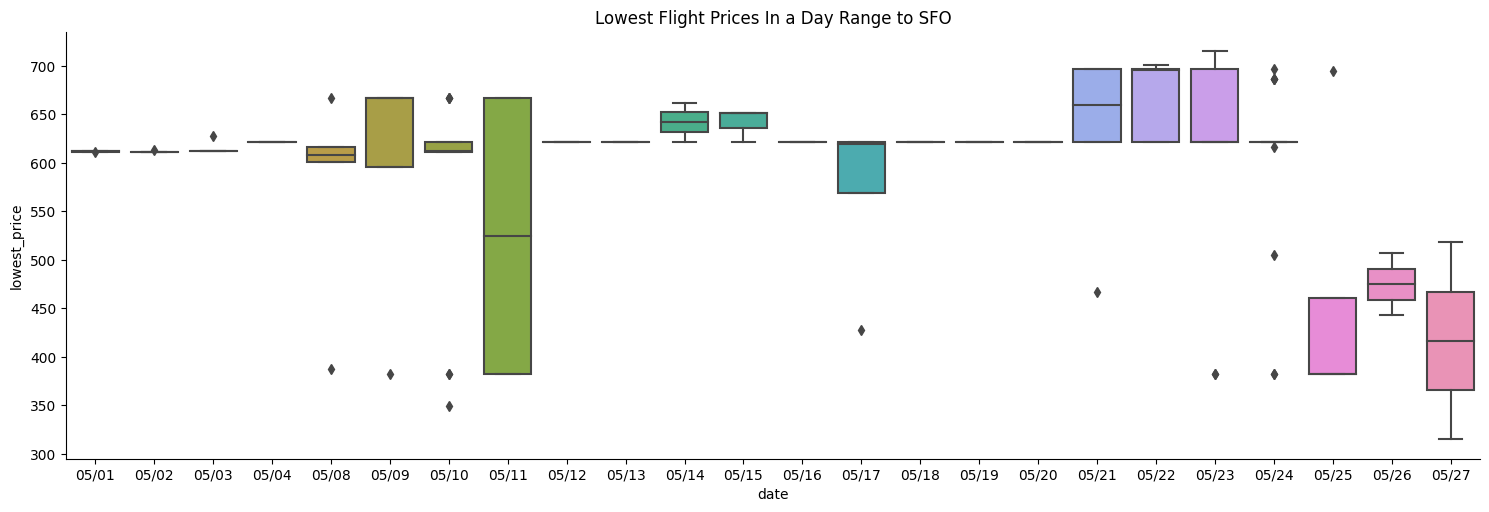

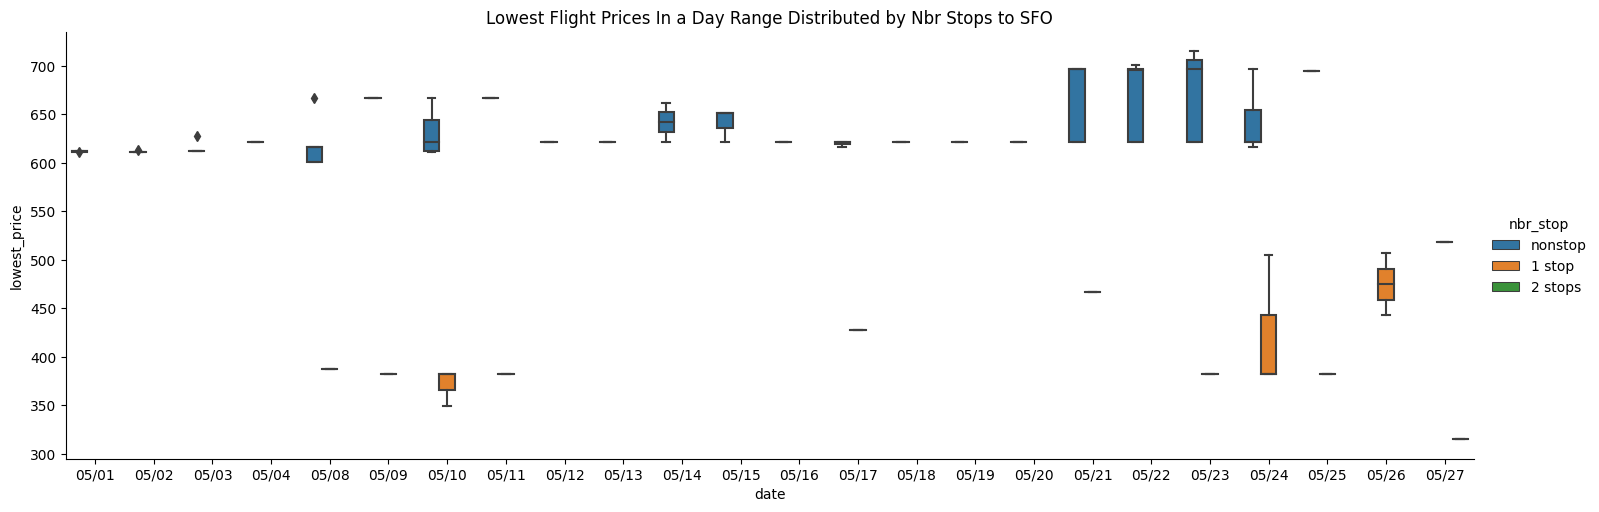

In [84]:
plt.rcParams["figure.figsize"] = (10,4)
# plt.figure(figsize=(10,4)) 

cheap_flight_master.sort_values(by = 'date', inplace = True)

title_string = "Lowest Flight Prices In a Day Range to " +  city_to

plot = sns.catplot(
    data=cheap_flight_master, 
    kind="box",
    x="date", 
    y="lowest_price",
    height=5, aspect=3, 
    legend = True,
).set(title = title_string)

plt.savefig('Img01.jpg', bbox_inches = 'tight')

# plt.show()

plt.rcParams["figure.figsize"] = (10,4)


title_string = "Lowest Flight Prices In a Day Range Distributed by Nbr Stops to " +  city_to
sns.catplot(
    data=cheap_flight_master, 
    kind="box",
    x="date", 
    y="lowest_price",
    hue="nbr_stop",
#     ax = axs,
    height=5, aspect=3
#     errorbar="sd", palette="dark", alpha=.6, height=6
).set(title = title_string)

plt.savefig('Img02.jpg', bbox_inches = 'tight')
# plt.savefig('Img02.jpg', bbox_inches = 'tight', dpi = 150)

# plt.show()




Lowest Price & Flight Hours Distribution:


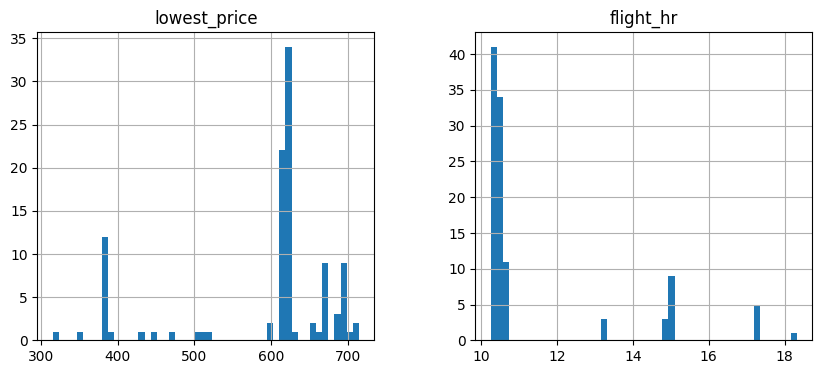

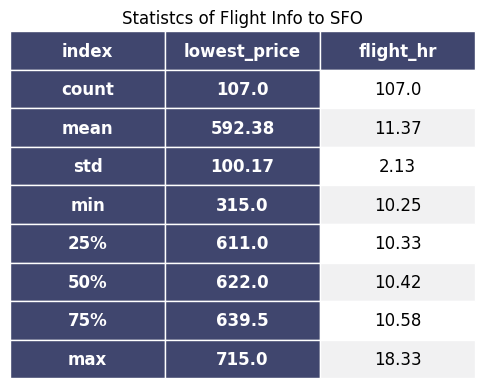

In [52]:
plt.rcParams["figure.figsize"] = (10,4)

print('Lowest Price & Flight Hours Distribution:')
cheap_flight_master[['lowest_price', 'flight_hr']].hist(bins = 50)
plt.savefig('Img03.jpg', bbox_inches = 'tight')

# plt.show()
# plt.title(['Flight Amount in: ' + df_avaialable_dt[0], 'Flight Amount in: ' + df_avaialable_dt[0]])
five_pt_stats = cheap_flight_master[['lowest_price', 'flight_hr']].describe()
five_pt_stats = five_pt_stats.round(2).reset_index()

five_pt_stats

title_string = "Statistcs of Flight Info to " +  city_to
render_mpl_table(five_pt_stats, header_columns=2, col_width=2,  row_height=0.5,  font_size=12)
plt.title(title_string)
plt.savefig('Img04.jpg', bbox_inches = 'tight')
# plt.show()


# Multiple Flight Dates Features Correlation

In [15]:
cheap_flight_master.head()


,date,time,airline,nbr_stop,intermediate_stop,duration,from,to,checked_bag,carry_on_bag,price,price2,price3,price4,lowest_price,flight_hr,datetime
10,05/01,12:20 pm–6:55 am+1,Austrian Airlines,nonstop,--,10h 35m,SFO,LHR,1,1,$612,0,0,0.0,612,10.58,5/1 - 12:20 pm–6:55 am+1
7,05/01,7:50 pm–2:10 pm+1,Lufthansa,nonstop,--,10h 20m,SFO,LHR,0,1,$611,0,0,0.0,611,10.33,5/1 - 7:50 pm–2:10 pm+1
1,05/01,4:00 pm–10:25 am+1,Brussels Airlines,nonstop,--,10h 25m,SFO,LHR,0,1,$612,0,0,0.0,612,10.42,5/1 - 4:00 pm–10:25 am+1
11,05/01,12:20 pm–6:55 am+1,Brussels Airlines,nonstop,--,10h 35m,SFO,LHR,0,1,$612,0,0,0.0,612,10.58,5/1 - 12:20 pm–6:55 am+1
8,05/02,7:50 pm–2:10 pm+1,Lufthansa,nonstop,--,10h 20m,SFO,LHR,0,0,$611,0,0,0.0,611,10.33,5/2 - 7:50 pm–2:10 pm+1


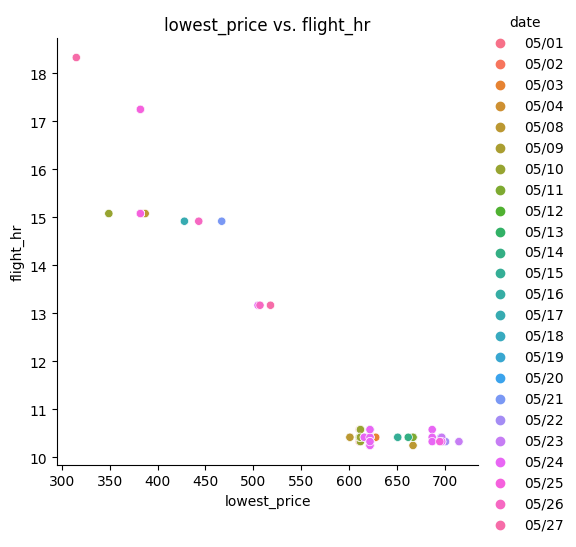

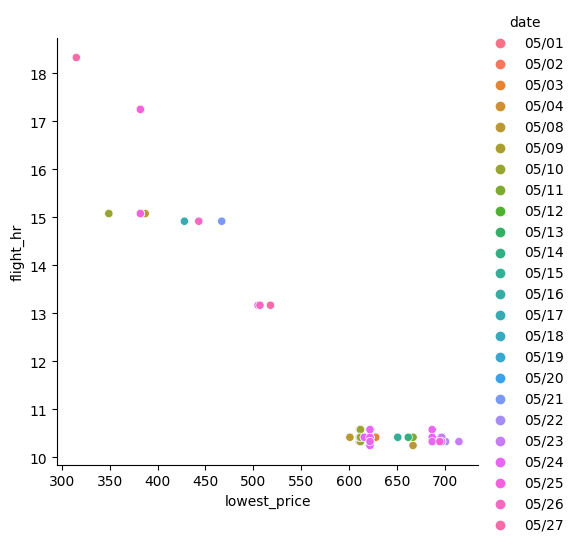

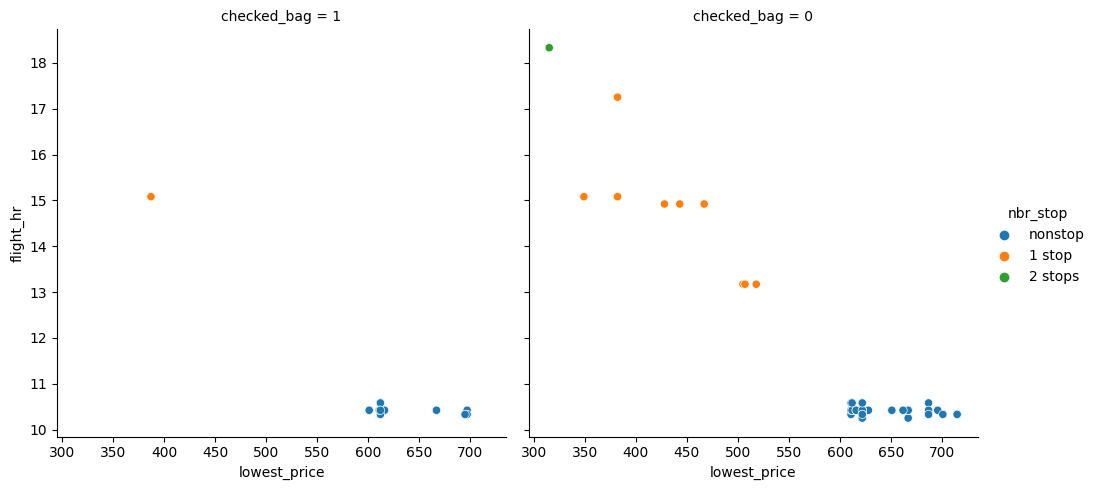

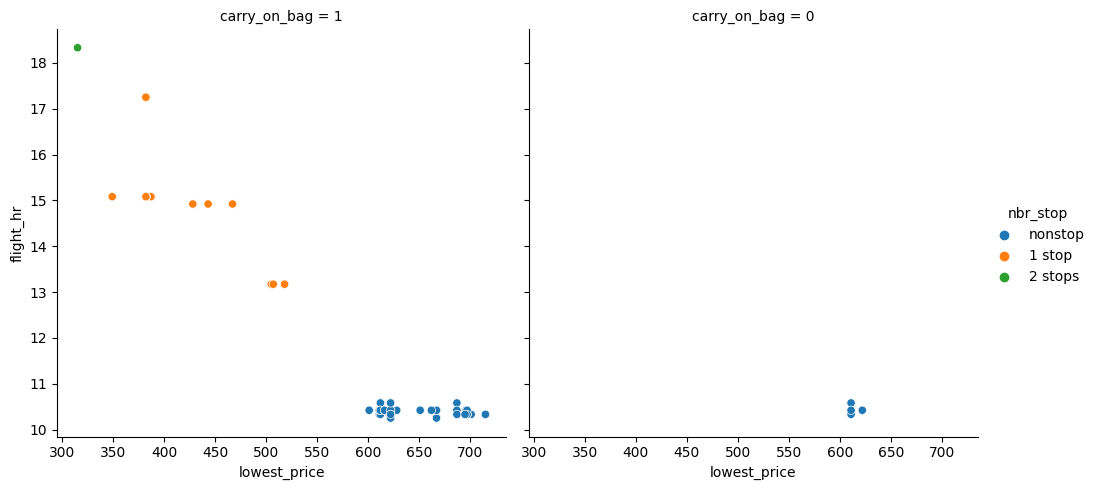

In [53]:
plt.rcParams["figure.figsize"] = (8,5)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="date", 
#             hue="nbr_stop", 
#             legend = False
           )
plt.title('lowest_price vs. flight_hr')
# plt.legend(ncol = 3, loc = 'best', bbox_to_anchor=(0, 1))
# plt.savefig('Img05.jpg', bbox_inches = 'tight')
# plt.show()

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="date", 
#             col="nbr_stop"
           )
# plt.title('lowest_price vs. flight_hr')
# plt.savefig('Img06.jpg', bbox_inches = 'tight')
# plt.show()

plt.rcParams["figure.figsize"] = (8,8)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="nbr_stop", 
            col="checked_bag"
           )
plt.savefig('Img07.jpg', bbox_inches = 'tight')
# plt.show()

plt.rcParams["figure.figsize"] = (8,8)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="nbr_stop", 
            col="carry_on_bag"
           )
plt.savefig('Img08.jpg', bbox_inches = 'tight')
# plt.show()

## Flight Frequency Available In Search By Datetime
### more applicable for few flight destinations

In [17]:
plt.rcParams["figure.figsize"] = (10,25)

# flight_time_stats = cheap_flight_master['time'].value_counts().reset_index().rename(columns ={'index':'time', 'time': 'nbr_flights'} )

cheap_flight_master= cheap_flight_master.sort_values(by = 'date')
flight_time_stats = cheap_flight_master.groupby(['date','datetime', 'nbr_stop'])['time'].count().reset_index().rename(columns = {'time':'nbr_flight'})

flight_time_stats
sns.barplot(data=flight_time_stats, 
            x="nbr_flight",
            y="datetime",
            hue = 'nbr_stop',
           )
plt.title('Flight Frequency By Datetime')
# plt.show()

Text(0.5, 1.0, 'Flight Frequency By Datetime')

In [18]:
city_from = 'CDG'  #France
city_to = 'SFO' #England, London 

# date must be aligned with current search engine web date info: Kayak: yyyy-mm-dd
flight_date = ['2023-05-10', '2023-05-17', '2023-05-24','2023-06-03']

# flight_date = ['2023-01-10', '2023-01-17', '2023-01-24',
#                '2023-02-03', '2023-02-10', '2023-02-17', '2023-02-24',
#                '2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24',
#                '2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24',
#                '2023-05-03', '2023-05-10', '2023-05-17', '2023-05-24',
#                '2023-06-03', '2023-06-10', '2023-06-17', '2023-06-24',
#               '2023-07-03', '2023-07-10', '2023-07-17', '2023-07-24',
#               '2023-08-03', '2023-08-10', '2023-08-17', '2023-08-24',
#               '2023-09-03', '2023-09-10', '2023-09-17', '2023-09-24',
#               '2023-10-03', '2023-10-10', '2023-10-17', '2023-10-24']

# flight_date = [ '2023-05-24',
#                '2023-06-03', '2023-06-10', '2023-06-17', '2023-06-24',
#               '2023-07-03', '2023-07-10', '2023-07-17', '2023-07-24',
#               '2023-08-03', '2023-08-10', '2023-08-17', '2023-08-24',
#               '2023-09-03', '2023-09-10', '2023-09-17', '2023-09-24',
#               '2023-10-03', '2023-10-10', '2023-10-17', '2023-10-24']

# depends on the capability of date range your selected search engine can provide, for Kayak, nbr_dt_range_search <=3, any int more still <= 3, 
# so that means max could search for 7 days in kayak: exact day +/-3days, which is a range in a week
# nbr_dt_range_search = 1 means could be +/-1 day
nbr_dt_range_search = 3
# nbr_click_this_session = 3
nbr_click_this_session = 1 # additional click after each initiate browsing so nbr of list is n+1

tstring = 'city_from: '+ city_from
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'city_to: ' + city_to
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'flight_date: ' + str(flight_date)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'nbr_dt_range_search: ' + str(nbr_dt_range_search)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'nbr_click_this_session: ' + str(nbr_click_this_session)
print(tstring)
tfile.write(tstring)
tfile.write('\n')


return_destinations = "-".join([city_from,city_to ])
return_destinations

city_from: CDG
city_to: SFO
flight_date: ['2023-05-10', '2023-05-17', '2023-05-24', '2023-06-03']
nbr_dt_range_search: 3
nbr_click_this_session: 1


'CDG-SFO'

In [20]:
# create empty df so each forloop sub_df can be add into master df
cheap_flight_master = pd.DataFrame()
# get info of the dt for which current sessions of queries starts, assuming price changes at anytime based on date & time of query
current_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")
print('Current Time To Search Flights:', current_datetime)

master_start_time = time.time()

for date in flight_date:
    
    cheap_flights = get_cheap_flights(city_from, city_to, date, nbr_dt_range_search, nbr_click_this_session)
    
    if (cheap_flights is not None):

        print("nbr of cheap_flights in this search on: ", date, " is ", cheap_flights.shape[0])
        print('------------------------------------------------------------------------------------------------\n')
        print('\n')
    #     continuously add cheap_flights df into cheap_flight_master df, rbind
        cheap_flight_master = cheap_flight_master.append(cheap_flights)

cheap_flight_master_return = cheap_flight_master

tstring = "Nbr of cheap flights in this search: " + str(cheap_flight_master.shape[0])
print(tstring)
tfile.write(tstring)
tfile.write('\n')

tstring = "--- %s mintues " % float( '%.5g' % ((time.time() - master_start_time)/60)) + 'to complete this seach session. --------'
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')


cheap_flight_master.shape

Current Time To Search Flights: 2023-01-25 13:25
city_from:  CDG
city_to:  SFO
flight_date:  2023-05-10
nbr_dt_range_search:  3
nbr_click_this_session:  1


/Users/eli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


Search Link: 

https://www.kayak.com/flights/CDG-SFO/2023-05-10-flexible-3day?sort=bestflight_a
sleeping.....
--- 0.57053 mintues to complete this seach session. --------
nbr of cheap_flights in this search on:  2023-05-10  is  32
------------------------------------------------------------------------------------------------



city_from:  CDG
city_to:  SFO
flight_date:  2023-05-17
nbr_dt_range_search:  3
nbr_click_this_session:  1
Search Link: 

https://www.kayak.com/flights/CDG-SFO/2023-05-17-flexible-3day?sort=bestflight_a
sleeping.....
Data crawl by 'nrc6' have NO ERROR but return empty list. Use 'ResultWrapper' attribute.
--- 0.71318 mintues to complete this seach session. --------
nbr of cheap_flights in this search on:  2023-05-17  is  31
------------------------------------------------------------------------------------------------



city_from:  CDG
city_to:  SFO
flight_date:  2023-05-24
nbr_dt_range_search:  3
nbr_click_this_session:  1
Search Link: 

https://www.kayak.com/

(109, 17)

In [58]:
cheap_flight_master = cheap_flight_master_return

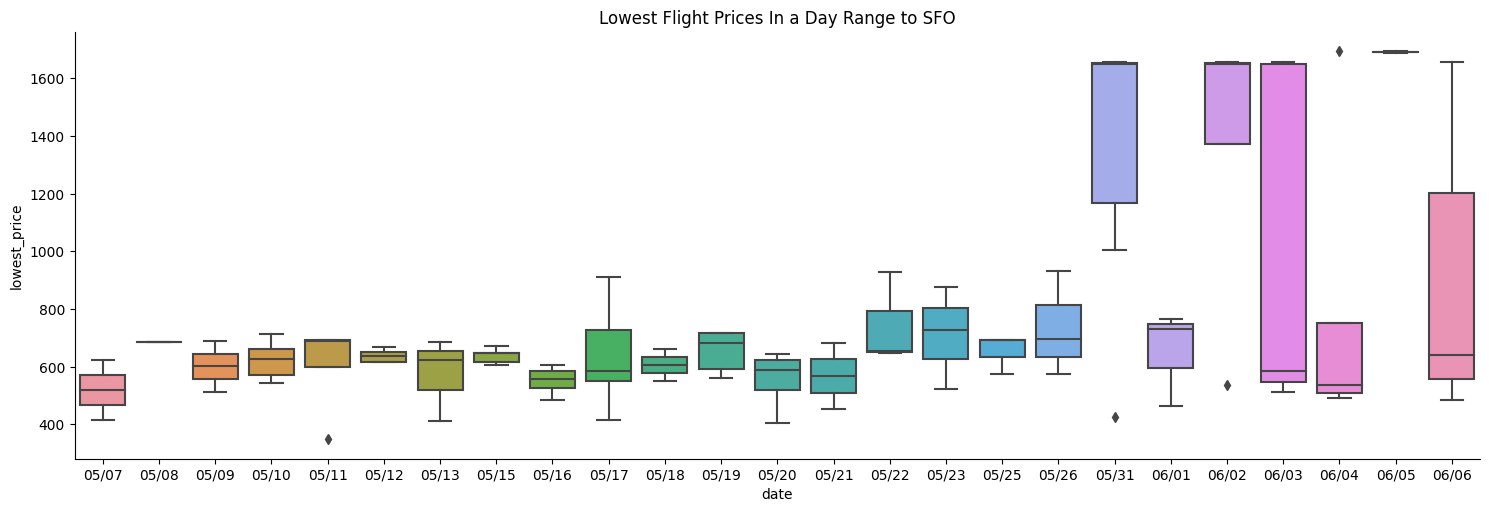

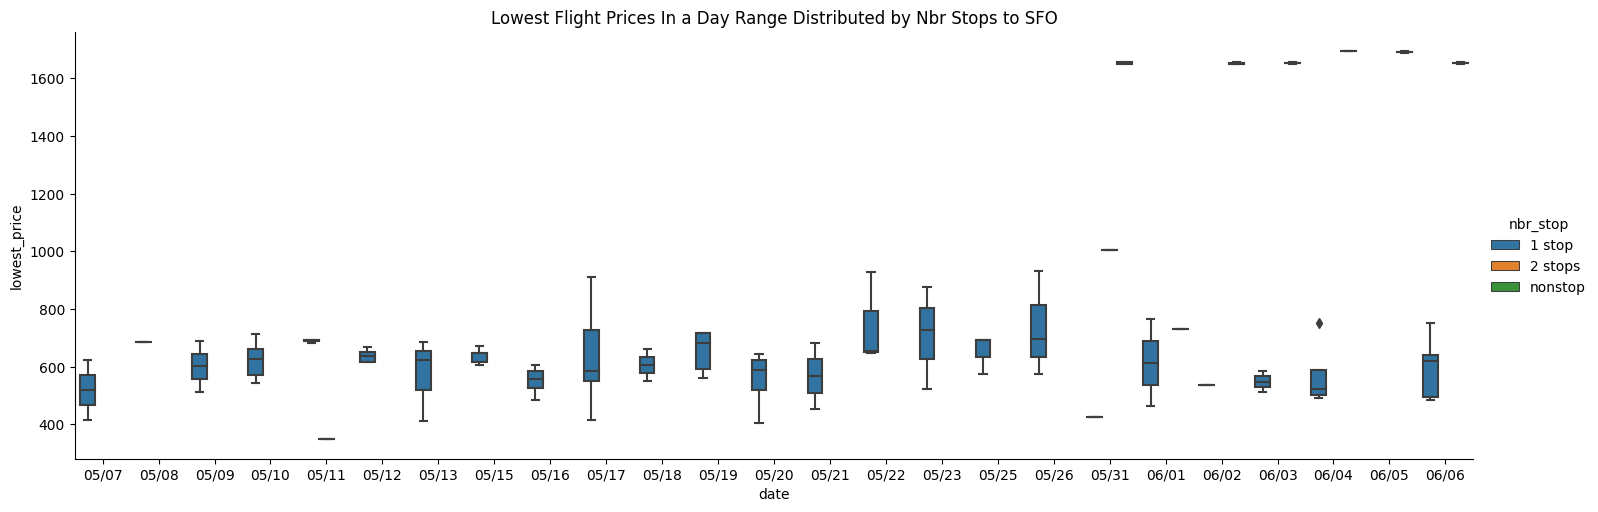

In [59]:

cheap_flight_master.sort_values(by = 'date', inplace = True)

title_string = "Lowest Flight Prices In a Day Range to " +  city_to

plot = sns.catplot(
    data=cheap_flight_master, 
    kind="box",
    x="date", 
    y="lowest_price",
    height=5, aspect=3, 
    legend = True,
).set(title = title_string)

plt.savefig('Img09.jpg', bbox_inches = 'tight')

# plt./show()

title_string = "Lowest Flight Prices In a Day Range Distributed by Nbr Stops to " +  city_to
sns.catplot(
    data=cheap_flight_master, 
    kind="box",
    x="date", 
    y="lowest_price",
    hue="nbr_stop",
#     ax = axs,
    height=5, aspect=3
#     errorbar="sd", palette="dark", alpha=.6, height=6
).set(title = title_string)

plt.savefig('Img10.jpg', bbox_inches = 'tight')
# plt.savefig('Img02.jpg', bbox_inches = 'tight', dpi = 150)

# plt.show()




Lowest Price & Flight Hours Distribution:


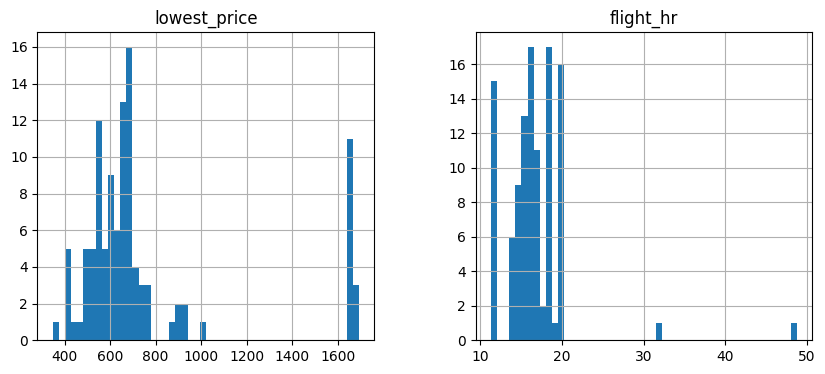

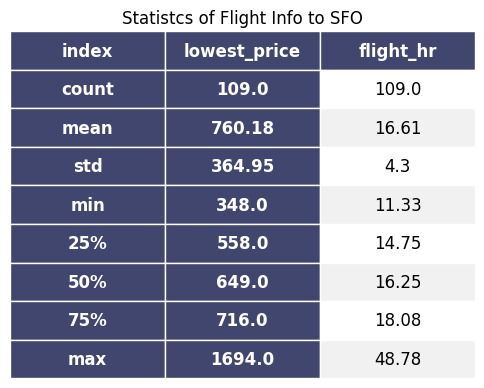

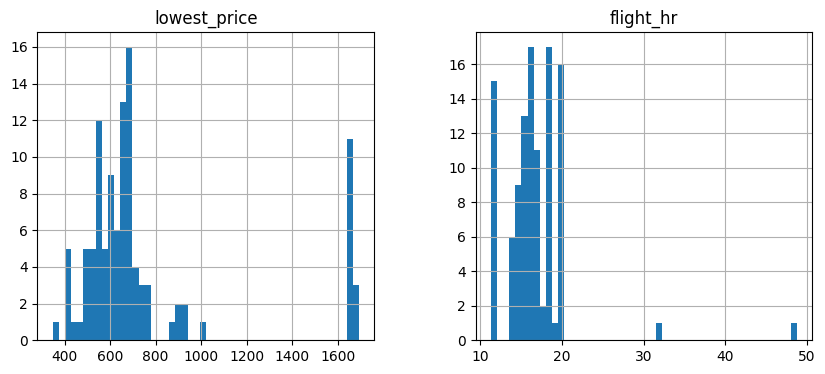

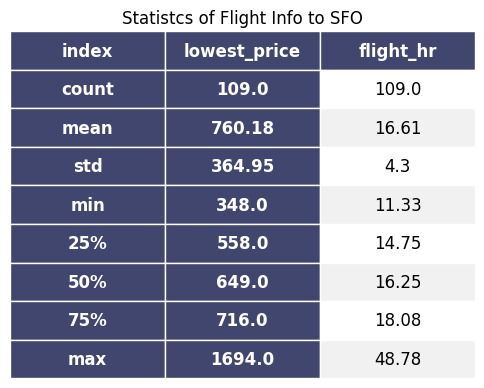

In [61]:
plt.rcParams["figure.figsize"] = (10,4)

print('Lowest Price & Flight Hours Distribution:')
cheap_flight_master[['lowest_price', 'flight_hr']].hist(bins = 50)
plt.savefig('Img11.jpg', bbox_inches = 'tight')
# plt.show()

# plt.title(['Flight Amount in: ' + df_avaialable_dt[0], 'Flight Amount in: ' + df_avaialable_dt[0]])
five_pt_stats = cheap_flight_master[['lowest_price', 'flight_hr']].describe()
five_pt_stats = five_pt_stats.round(2).reset_index()

five_pt_stats

title_string = "Statistcs of Flight Info to " +  city_to
render_mpl_table(five_pt_stats, header_columns=2, col_width=2,  row_height=0.5,  font_size=12)
plt.title(title_string)
plt.savefig('Img12.jpg', bbox_inches = 'tight')
# plt.show()

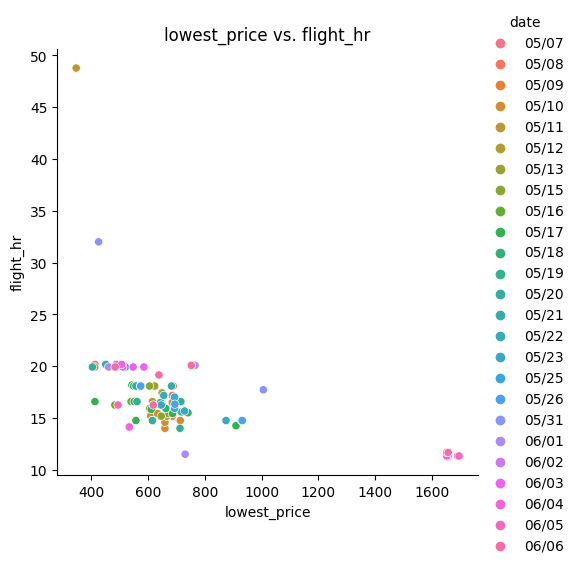

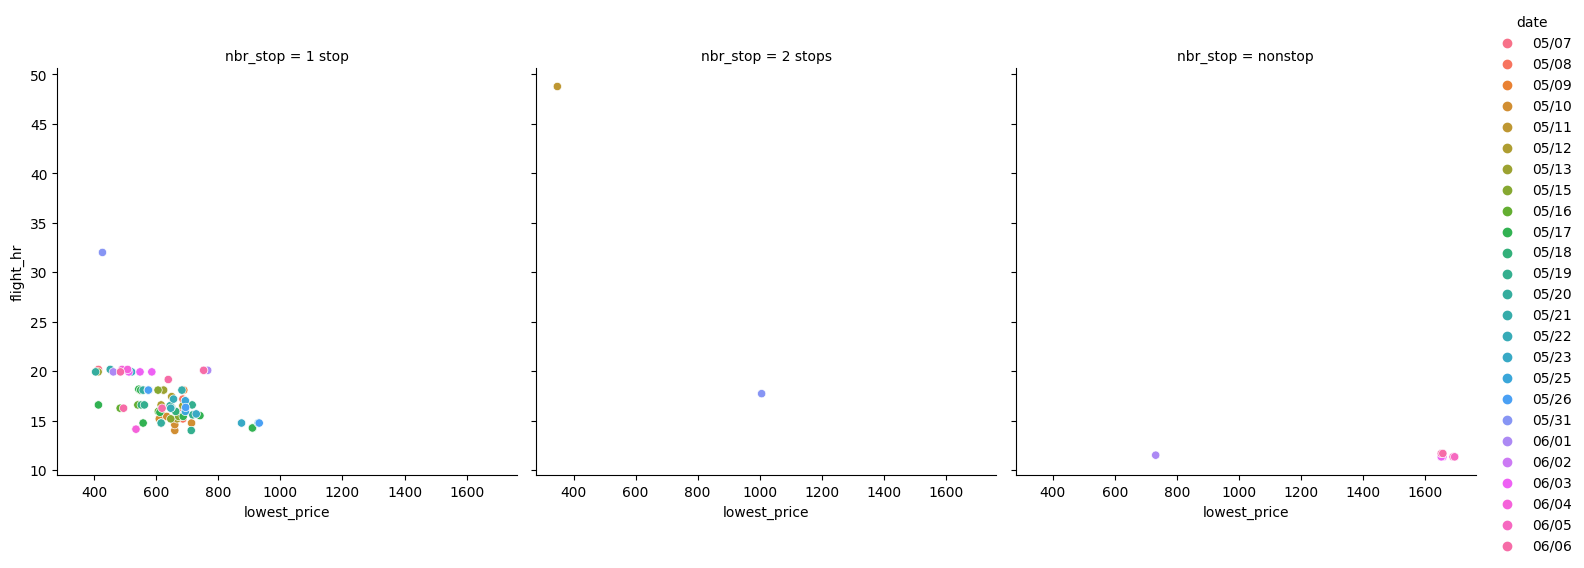

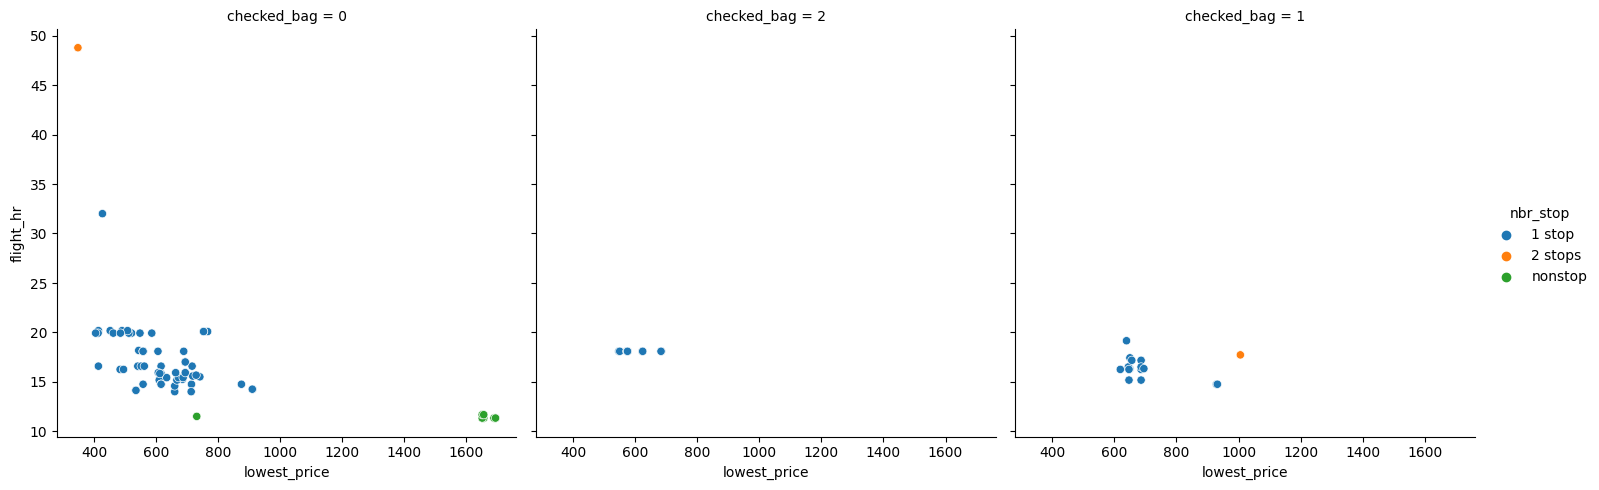

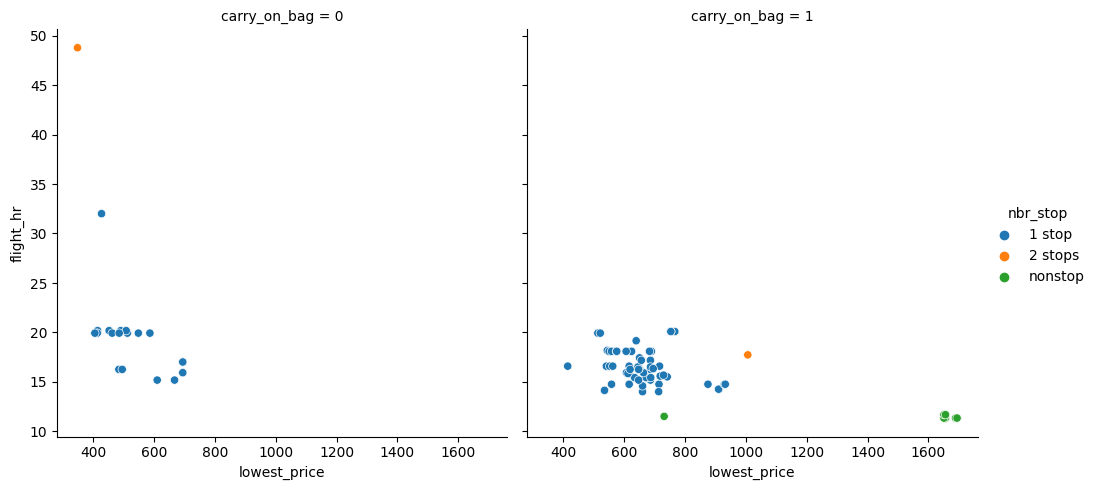

In [62]:
plt.rcParams["figure.figsize"] = (5,5)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="date", 
           )
plt.title('lowest_price vs. flight_hr')
# plt.savefig('Img13.jpg', bbox_inches = 'tight')
# plt.show()

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="date", 
            col="nbr_stop"
           )
# plt.title('lowest_price vs. flight_hr')
# plt.savefig('Img14.jpg', bbox_inches = 'tight')
# plt.show()

plt.rcParams["figure.figsize"] = (8,8)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="nbr_stop", 
            col="checked_bag"
           )
plt.savefig('Img15.jpg', bbox_inches = 'tight')
# plt.show()

plt.rcParams["figure.figsize"] = (8,8)

sns.relplot(data=cheap_flight_master, x="lowest_price", y="flight_hr", 
            hue="nbr_stop", 
            col="carry_on_bag"
           )
plt.savefig('Img16.jpg', bbox_inches = 'tight')
# plt.show()

## Merge cheap_flight_master_go & cheap_flight_master_back (Multiple Date Choices On Target Locations)

In [63]:
# cheap_flight_master_go = cheap_flight_master_depart.add_prefix('g_')
# cheap_flight_master_back = cheap_flight_master_return.add_prefix('b_')

# depart_top50 = cheap_flight_master_go[['g_flight_hr', 'g_lowest_price']].sort_values(by = [  'g_lowest_price','g_flight_hr']).head(50)
# return_top50 = cheap_flight_master_back[['b_flight_hr', 'b_lowest_price']].sort_values(by = [  'b_lowest_price','b_flight_hr']).head(50)

# # get the min of either mean/median
# price_threshold_depart = max(depart_top50['g_lowest_price'])
# # get the min of either mean/median
# flight_hr_threshold_depart = max(depart_top50['g_flight_hr'])
# # # get the min of either mean/median
# price_threshold_return = max(return_top50['b_lowest_price'])
# # get the min of either mean/median
# flight_hr_threshold_return = max(return_top50['b_flight_hr'])

# # flight_hr_threshold_depart = 15
# # flight_hr_threshold_return = 15

# price_threshold_depart = max(cheap_flight_master_depart['lowest_price'].describe()[[1,5]].tolist())
# price_threshold_depart

# flight_hr_threshold_depart = round(max(cheap_flight_master_depart['flight_hr'].describe()[[1,5]].tolist()),2)
# flight_hr_threshold_depart

# price_threshold_return = round(max(cheap_flight_master_return['lowest_price'].describe()[[1,5]].tolist()))
# price_threshold_return

# flight_hr_threshold_return = max(cheap_flight_master_return['flight_hr'].describe()[[1,5]].tolist())
# flight_hr_threshold_return
# get mean & median of each variable
price_threshold_depart = round(min(cheap_flight_master_depart['lowest_price'].describe()[[1,5]].tolist()),2)
price_threshold_depart

flight_hr_threshold_depart = round(min(cheap_flight_master_depart['flight_hr'].describe()[[1,5]].tolist()),2)
flight_hr_threshold_depart

price_threshold_return = round(min(cheap_flight_master_return['lowest_price'].describe()[[1,5]].tolist()))
price_threshold_return

flight_hr_threshold_return = round(min(cheap_flight_master_return['flight_hr'].describe()[[1,5]].tolist()),2)
flight_hr_threshold_return


tstring = 'price_threshold_depart: ' + str(price_threshold_depart)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'flight_hr_threshold_depart: ' + str(flight_hr_threshold_depart)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'price_threshold_return: ' + str(price_threshold_return)
print(tstring)
tfile.write(tstring)
tfile.write('\n')
tstring = 'flight_hr_threshold_return: ' + str(flight_hr_threshold_return)
print(tstring)
tfile.write(tstring)
tfile.write('\n')


trip_duration_threshold = [5, 14]


price_threshold_depart: 592.38
flight_hr_threshold_depart: 10.42
price_threshold_return: 649
flight_hr_threshold_return: 16.25


In [64]:
cheap_flight_master_depart['flight_hr'].describe()

count    107.000000
mean      11.372336
std        2.125231
min       10.250000
25%       10.330000
50%       10.420000
75%       10.580000
max       18.330000
Name: flight_hr, dtype: float64

In [66]:
# add prefix so you two df of diff purposes can be differentiated after merged
cheap_flight_master_go = cheap_flight_master_depart.add_prefix('g_')
cheap_flight_master_back = cheap_flight_master_return.add_prefix('b_')

print('cheap_flight_master_go: ', cheap_flight_master_go.shape)
print('cheap_flight_master_back: ', cheap_flight_master_back.shape)



################################################################################################
# This is optional to filter cheaper price or less flight hours 
# remove outside budget flights to expedite merging for interested of flights, not going to pick high end
cheap_flight_master_go = cheap_flight_master_go[(cheap_flight_master_go['g_flight_hr']<= flight_hr_threshold_depart)  | (cheap_flight_master_go['g_lowest_price']<= price_threshold_depart)]
cheap_flight_master_back = cheap_flight_master_back[(cheap_flight_master_back['b_flight_hr']<=flight_hr_threshold_return)  & (cheap_flight_master_back['b_lowest_price']<= price_threshold_return)]
################################################################################################

print('cheap_flight_master_go: ', cheap_flight_master_go.shape)
print('cheap_flight_master_back: ', cheap_flight_master_back.shape)


# the col/idx to merge from, here we want to have single from/to which is sfo for now
cheap_flight_round_trip = pd.merge(cheap_flight_master_go, cheap_flight_master_back, left_on = 'g_from' , right_on = 'b_to')
# cheap_flight_round_trip = pd.merge(cheap_flight_master_go, cheap_flight_master_back)

print('cheap_flight_round_trip: ', cheap_flight_round_trip.shape)

cheap_flight_round_trip.drop_duplicates(inplace = True)
print('cheap_flight_round_trip: ', cheap_flight_round_trip.shape)

from datetime import datetime
# get current year to fill out the full date info from the df
current_yr = datetime.today().strftime("%Y")
# convert date in string to datetime to cal for trip duration/
cheap_flight_round_trip['g_dt_str'] = [x + '/' +(current_yr) for x in cheap_flight_round_trip['g_date']]
cheap_flight_round_trip['g_dt'] = [datetime.strptime(x, '%m/%d/%Y' ) for x in cheap_flight_round_trip['g_dt_str']]
cheap_flight_round_trip['b_dt_str'] = [x + '/' +(current_yr) for x in cheap_flight_round_trip['b_date']]
cheap_flight_round_trip['b_dt'] = [datetime.strptime(x, '%m/%d/%Y' ) for x in cheap_flight_round_trip['b_dt_str']]
# substraction get timedelta obj which is converted into int
cheap_flight_round_trip['trip_duration_dt'] = (cheap_flight_round_trip['b_dt'] - cheap_flight_round_trip['g_dt']).dt.days
cheap_flight_round_trip= cheap_flight_round_trip[cheap_flight_round_trip['trip_duration_dt']>  0]
# cheap_flight_round_trip[['g_date', 'g_dt_str', 'g_dt', 'b_date','b_dt_str', 'b_dt','trip_duration' ]]
# cheap_flight_round_trip[['g_dt', 'b_dt','trip_duration' ]]


# get more stats for the terminal flights total price & flight hours, and intermediate travel IATA
cheap_flight_round_trip['itm_travel'] = cheap_flight_round_trip['g_to'] + "-" + cheap_flight_round_trip['b_from']
cheap_flight_round_trip['rt_lowest_price'] = cheap_flight_round_trip['g_lowest_price'] + cheap_flight_round_trip['b_lowest_price']
cheap_flight_round_trip['rt_flight_hr'] = round(cheap_flight_round_trip['g_flight_hr'] + cheap_flight_round_trip['b_flight_hr'],2)
cheap_flight_round_trip.shape

print('cheap_flight_round_trip: ', cheap_flight_round_trip.shape)

# make sure g_to IATA is not the same as b_from IATA so we ensure multiple travel locationss (can deal with the intermediate flight later)
cheap_flight_round_trip = cheap_flight_round_trip[(cheap_flight_round_trip['g_to'] != cheap_flight_round_trip['b_from'])]
# ensure round trip contains certain days duration predefined:
cheap_flight_round_trip = cheap_flight_round_trip[cheap_flight_round_trip['trip_duration_dt'].between(min(trip_duration_threshold), max(trip_duration_threshold))]

cheap_flight_round_trip.drop_duplicates(inplace = True)

print('cheap_flight_round_trip: ', cheap_flight_round_trip.shape)

cheap_flight_round_trip.sort_values(by = 'rt_lowest_price', inplace = True)


tstring = 'trip_duration_threshold: ' + str(trip_duration_threshold)
print(tstring)
tfile.write(tstring)
tfile.write('\n')

tstring = 'Best round-trip flights filtered: ' + str(cheap_flight_round_trip.shape[0])
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')

cheap_flight_master_go:  (107, 17)
cheap_flight_master_back:  (109, 17)
cheap_flight_master_go:  (96, 17)
cheap_flight_master_back:  (17, 17)
cheap_flight_round_trip:  (1632, 34)
cheap_flight_round_trip:  (1547, 34)
cheap_flight_round_trip:  (858, 42)
cheap_flight_round_trip:  (468, 42)
trip_duration_threshold: [5, 14]
Best round-trip flights filtered: 468


2

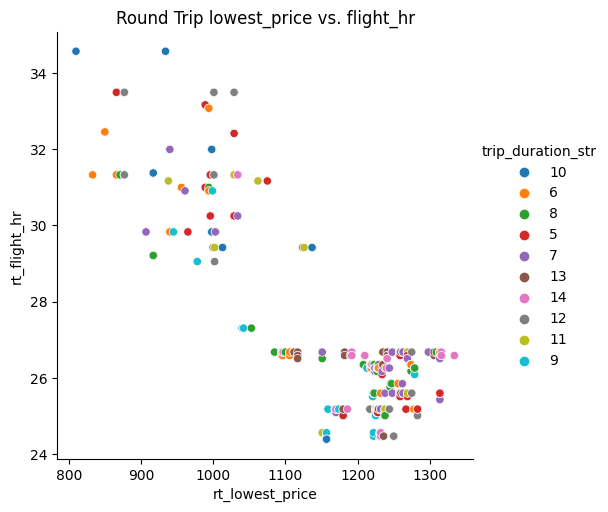

In [67]:
plt.rcParams["figure.figsize"] = (8,8)

cheap_flight_round_trip['trip_duration_str'] = cheap_flight_round_trip['trip_duration_dt'].astype(str)
sns.relplot(data=cheap_flight_round_trip, x="rt_lowest_price", y="rt_flight_hr", 
            hue="trip_duration_str", 
           )
plt.title('Round Trip lowest_price vs. flight_hr')
plt.savefig('Img17.jpg', bbox_inches = 'tight')

# plt.show()

In [68]:
# decide the columns to export
cheap_flight_rt_export = cheap_flight_round_trip[['g_date', 'g_time', 'g_airline', 'g_nbr_stop', 'g_intermediate_stop',
       'g_duration', 'g_from', 'g_to', 'g_checked_bag', 'g_carry_on_bag',
        'g_lowest_price',
       'g_flight_hr', 'g_datetime', 'b_date', 'b_time', 'b_airline',
       'b_nbr_stop', 'b_intermediate_stop', 'b_duration', 'b_from', 'b_to',
       'b_checked_bag', 'b_carry_on_bag','b_lowest_price', 'b_flight_hr', 'b_datetime', 
        'trip_duration_dt', 'itm_travel',
       'rt_lowest_price', 'rt_flight_hr', ]]

In [69]:
title_string = "Cheap Flight Round Trip Info." 

chosen_cols = ['g_date', 'g_airline', 'g_nbr_stop', 'g_intermediate_stop',
        'g_from', 'g_to', 'g_lowest_price',
       'g_flight_hr', 'b_date',  'b_airline',
       'b_nbr_stop', 'b_intermediate_stop',  'b_from', 'b_to',
        'b_lowest_price', 'b_flight_hr',  'itm_travel',
       'rt_lowest_price', 'rt_flight_hr','trip_duration_dt']
cheap_flight_rt_display = cheap_flight_round_trip[chosen_cols].head(10)
cheap_flight_rt_display

render_mpl_table(cheap_flight_rt_display, header_columns=2, col_width=2,  row_height=0.5,  font_size=12)
plt.title(title_string)
plt.savefig('Img18.jpg', bbox_inches = 'tight')
# plt.show()


## Create Excel File for detailed Flight Record Info.

In [70]:


#################################### convert key df into .xlsx file ######################################################
# change dir for file export
os.chdir(output_dir)
# convert detailed df into excel in current dir
cheap_flight_rt_export.to_excel(output_xlsx)


In [94]:
############################### convert a list of images (.gif, .jpg, .png) of the same dir into a .pdf file.  ##########################
from fpdf import FPDF
from PIL import Image
import glob
import os

originalWidth = []
originalHeight = []
originalWidth = []
originalHeight = []

#define location of the images saved that you want to create a pdf report from
# usually is the same dir of the images just saved from this script, 
image_directory = '/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages'
extensions = ('*.png', '*.jpg', '*.gif')

# create two objs one for each PS/DS team pdf report output
pdf = FPDF()

imagelist = []

for ext in extensions: 
    imagelist.extend(glob.glob(os.path.join(image_directory, ext)))
    
imagelist = sorted(imagelist)
imagelist

accum_height = 0
orientation = 'L'
pdf.add_page(orientation=orientation)


# for imageFile in imagelist:
for idx, imageFile in enumerate(imagelist):
    print('idx:', idx)
    cover = Image.open(imageFile)
    width, height = cover.size
#     print('\n')
    print(imageFile)
    
    print('original width',width, ":",'original height', height)
    print('initial area:', width*height )
    print('width / height:', round(width / height) )

    x,y = 20,20
    #customized resize the original image size based on h & w ratio & width conditions, 
#     x, y are for the page margin to put the image 
#     choice are the marker to track label during development
    if (round(width / height) >= 3):
        
        if(width < 2000):
            width, height = round(float(width * 0.15)),  round(float(height * 0.15))
            x,y = 20,20
            choice = 1.1
        
        else:
            width, height =  round(float(width * 0.085)),  round(float(height * 0.11))
            x,y = 12,20
            choice = 1.2

    elif (round(width / height) >= 2):
        if(width >= 1300):
            width, height =  round(float(width * 0.4)),  round(float(height * 0.4))
            x,y = 20,20
            choice = 2.1

        else:
            width, height =  round(float(width * 0.16)),  round(float(height * 0.16))
            x,y = 60,20
            choice = 2.2

        
    else: 
        width, height =  round(float(width * 0.15)),  round(float(height * 0.15))
        x,y = 80,20
        choice = 3


#     orientatation of the page depend on the shape of the image
    pdf_size = {'P': {'w': 210, 'h': 297}, 'L': {'w': 297, 'h': 210}}

    # get page orientation from image size 
#     orientation = 'L'
#     print('orientation:', orientation)
    #  make sure image size is not greater than the pdf format size
    width = width if width < pdf_size[orientation]['w'] else pdf_size[orientation]['w']
    height = height if height < pdf_size[orientation]['h'] else pdf_size[orientation]['h']

    print('adjusted size:',width,  height)
    print("accum_height before:", accum_height)
    
    if  accum_height>= 150:
        pdf.add_page(orientation=orientation)
        pdf.image(imageFile, x, y, width, height)
        accum_height = 0
        print('CHOICE:', choice)
        print('on NEW page')

    print('current y:', y)
    
    print('y', y)
    print('height', height)

    pdf.image(imageFile, x, accum_height+ y, width, height)
    print('on EXISTING page')
    print('CHOICE:', choice)

    accum_height += height + y

print(output_pdf)
pdf.output(output_pdf, "F")



idx: 0
/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages/Img01.jpg
original width 1489 : original height 512
initial area: 762368
width / height: 3
adjusted size: 223 77
accum_height before: 0
current y: 20
y 20
height 77
on EXISTING page
CHOICE: 1.1
idx: 1
/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages/Img02.jpg
original width 1599 : original height 512
initial area: 818688
width / height: 3
adjusted size: 240 77
accum_height before: 97
current y: 20
y 20
height 77
on EXISTING page
CHOICE: 1.1
idx: 2
/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages/Img03.jpg
original width 822 : original height 374
initial area: 307428
width / height: 2
adjusted size: 132 60
accum_height before: 194
CHOICE: 2.2
on NEW page
current y: 20
y 20
height 60
on EXISTING page
CHOICE: 2.2
idx: 3
/Users/eli/Python/personal_projects/CheapFlightTickets/outputImages/Img04.jpg
original width 484 : original height 388
initial area: 187792
width / height: 1
ad

''

## Indicate all flies location & close log files 

In [72]:

tstring = 'Files Locations:\n'
# location of pdf
tfile.write(tstring)
tfile.write(output_pdf)
tfile.write('\n')
# location of xlsx
tstring = output_dir + output_xlsx
tfile.write(tstring)
tfile.write('\n')
# location of txt/log
tstring = output_txt
tfile.write(output_txt)
tfile.write('\n\n')

tstring = "--- %s mintues " % float( '%.5g' % ((time.time() - script_start_time)/60)) + 'to complete this script run. --------'
print(tstring)
tfile.write(tstring)
tfile.write('\n\n')


tfile.close()



--- 23.527 mintues to complete this script run. --------


# Send Major Files To Target Emails

In [73]:
# import smtplib
import email, smtplib, ssl

from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email import encoders


In [46]:
# #  port 465 and 587 are both valid ports for a mail submission agent (MSA)
# # 465 requires negotiation of TLS/SSL at connection setup and port 587 uses STARTTLS if one chooses to negotiate TLS.
# # sending email methods 1 w/ SSLL (or TLS)
# def send_email(subject, body, sender, recipients, password):
#     msg = MIMEText(body)
#     msg['Subject'] = subject
#     msg['From'] = sender
#     msg['To'] = ', '.join(recipients)
#     smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
#     smtp_server.login(sender, password)
#     smtp_server.sendmail(sender, recipients, msg.as_string())
#     smtp_server.quit()
    
# start_time = time.time()


# subject = "ECL Email Test"
# # body = "Testing to see if target account receive email"

# body = "Testing to see if target account receive email w/ Attachments"
# sender = "aidatasciences@gmail.com"
# password = 'gqdbrqtcplnovyom'  #only app password available for gmail app after May 2022
# # recipients = ["recipient1@gmail.com", "recipient2@gmail.com"]
# recipients = ["aidatasciences@gmail.com"]

# send_email(subject, body, sender, recipients, password)
# print("--- %s mintues " % float( '%.5g' % ((time.time() - start_time)/60)) + 'to complete Sending Emails --------')



--- 0.037758 mintues to complete Sending Emails --------


In [74]:



def send_email(subject, body, sender, recipients, password, output_pdf = None, output_xlsx = None, output_txt = None):
    # msg is an MIMEMultipart object that can include both txt and attachments
    msg = MIMEMultipart()
    # msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender
    msg['To'] = ', '.join(recipients)
    # msg['Bcc'] = sender
    msg.attach(MIMEText(body, "plain"))

#     below could possibly attach all three files only if they are provided in this func
    ############## Encoding binary data PDF into ASCII characters thru base64 and attach ot the msg obj #########################
    # Open PDF file in binary mode
    if output_pdf is not None:
        with open(output_pdf, "rb") as attachment:
            # Add file as application/octet-stream
            # Email client can usually download this automatically as attachment
            part_pdf = MIMEBase("application", "octet-stream")
            part_pdf.set_payload(attachment.read())
        # Encode file in ASCII characters to send by email    
        encoders.encode_base64(part_pdf)
        # Add header as key/value pair to attachment part
        part_pdf.add_header(
            "Content-Disposition",
            f"attachment; filename= {output_pdf_name}",
        )
        # Add attachment to message and convert message to string
        msg.attach(part_pdf)
    #########################################end of PDF attach ################################################################
    ############## Encoding binary data EXCEL into ASCII characters thru base64 and attach ot the msg obj #########################
    # Open PDF file in binary mode
    if output_xlsx is not None:
        with open(output_xlsx, "rb") as attachment:
            # Add file as application/octet-stream
            # Email client can usually download this automatically as attachment
            part_xlsx = MIMEBase("application", "octet-stream")
            part_xlsx.set_payload(attachment.read())
        # Encode file in ASCII characters to send by email    
        encoders.encode_base64(part_xlsx)
        # Add header as key/value pair to attachment part
        part_xlsx.add_header(
            "Content-Disposition",
            f"attachment; filename= {output_xlsx}",
        )
        # Add attachment to message and convert message to string
        msg.attach(part_xlsx)
    #########################################end of XLSX attach ################################################################
    ############## Encoding binary data TXT/LOG  into ASCII characters thru base64 and attach ot the msg obj #########################
    # Open PDF file in binary mode
    
    if output_txt is not None:
        with open(output_txt, "rb") as attachment:
            # Add file as application/octet-stream
            # Email client can usually download this automatically as attachment
            part_txt = MIMEBase("application", "octet-stream")
            part_txt.set_payload(attachment.read())
        # Encode file in ASCII characters to send by email    
        encoders.encode_base64(part_txt)
        # Add header as key/value pair to attachment part
        part_txt.add_header(
            "Content-Disposition",
            f"attachment; filename= {output_txt_name}",
        )
        # Add attachment to message and convert message to string
        msg.attach(part_txt)
    #########################################end of TXT/LOG attach ################################################################

    msg_w_attachments = msg.as_string()

    smtp_server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp_server.login(sender, password)
    smtp_server.sendmail(sender, recipients, msg_w_attachments)
    smtp_server.quit()


In [109]:

################## Define all necesary elements for email #############
# subject = "ECL Email Test"
subject = "ECL Email Test: " + " " + depart_destinations  + "--" + return_destinations
# body = "Testing to see if target account receive email"
# body = "Testing to see if target accounts receive email w/ PDF & EXCEL Attachments, multiple emails, multile domains"
body = """Testing to see if target accounts receive email w/ PDF, EXCEL & TXT Attachments, multiple emails\n
DEPART DESTINATION:  """ + depart_destinations +"""\nRETURN DESTINATION:  """ + return_destinations

# sender = "aidatasciences@gmail.com"

os.chdir('/Users/eli/Python/personal_projects/')
import user_config as uc
sender = uc.sender
# this is the app password associate with sender gmail account, only app password available for gmail app after May 2022
password = uc.password
recipients_eli =uc.recipients_eli
general_recipients = uc.general_recipients 


# print('sender: ', sender)
# print('password: ', password)
# print('recipients_eli: ', recipients_eli)
# print('general_recipients: ', general_recipients)


In [76]:
# sending to owner include txt file to keep track of script info
start_time = time.time()
send_email(subject, body, sender, recipients_eli, password, output_pdf, output_xlsx, output_txt)
print("--- %s mintues " % float( '%.5g' % ((time.time() - start_time)/60)) + 'to complete Sending Emails --------')


--- 0.068145 mintues to complete Sending Emails --------


In [77]:
# sending to general recipients only show charts & flight records
start_time = time.time()
send_email(subject, body, sender, general_recipients, password, output_pdf, output_xlsx, None)
print("--- %s mintues " % float( '%.5g' % ((time.time() - start_time)/60)) + 'to complete Sending Emails --------')


--- 0.048518 mintues to complete Sending Emails --------


In [104]:
del general_recipients

In [ ]:
# Schedule the

In [107]:
os.getcwd()

'/Users/eli/Python/personal_projects/CheapFlightTickets/analysisResultOutput'